In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.offline import *

from math import ceil
from itertools import cycle

import pycountry

import nltk

from urllib.request import urlopen
import json

from sklearn.linear_model import LinearRegression
from scipy import stats


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)
np.set_printoptions(threshold=np.inf)

In [4]:
path = "https://raw.githubusercontent.com/ua-chjb/michelin_reviews/refs/heads/main/assets/data/michelin_cleaned.csv"

michelin = pd.read_csv(path)

In [10]:
import warnings
warnings.filterwarnings("ignore")

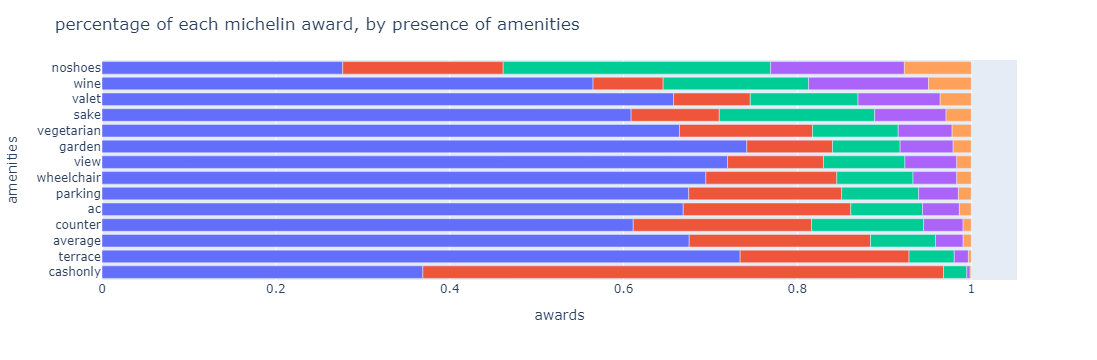

In [27]:
fig_H

In [26]:
def fig_h_func_2(df):
    onehot_cols = [ 
                "ac",	
                "wheelchair", 
                "parking", 
                "garden",	
                "wine",	
                "terrace", 
                "valet", 
                "vegetarian", 
                "counter", 
                "view",
                "noshoes", 
                "cashonly", 
                "sake"
                ]

    # define function for pivot of bar_percentage chart
    def pivot_table_from_count(df1, x, y):

        gb = df1.groupby([x, y]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :3]
        pivot = gb.pivot(columns=x, index=y)
        pivot.columns = pivot.columns.droplevel()
        
        pivot["sum"] = pivot.sum(axis=1)
        
        for col in pivot.columns:
            for s in pivot.index:
                pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

        pivot.index = ["".join([y, str(0)]), y]
        
        return pivot.drop(["sum"], axis=1).drop("".join([y, str(0)]), axis=0)
        
    # combine data for of bar_percentage chart     
    onehot_barchart_dict = {}
    for onehot in onehot_cols:
        try:
            onehot_barchart_dict[onehot] = pivot_table_from_count(df, "Award", onehot)
        except:
            pass

    onehot_big_df = pd.concat(onehot_barchart_dict.values())
    onehot_big_df = onehot_big_df.T[::-1].T

    onehot_big_df = onehot_big_df[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]
    x = "Award"
    df = michelin # why is this here

    gb = michelin.groupby([x]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :2]
    pivot = gb.set_index("Award").T

    pivot["sum"] = pivot.sum(axis=1)

    # turn to percentage of data
    for col in pivot.columns:
        for s in pivot.index:
            pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

    pivot = pivot.T.rename(columns={"count": "average"}).T

    pivot = pivot.drop(["sum"], axis=1)

    pivot = pivot[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]

    # finalize full data in proper format, concatenated with "average" feature
    onehot_big_pivot = pd.concat([onehot_big_df, pivot])
    onehot_big_pivot = onehot_big_pivot.sort_values(by=["3 Stars"], ascending=True)

    return onehot_big_pivot

def fig_h_func_1(pivot):
    return px.bar(pivot, x=pivot.columns, y=pivot.index).update_layout({
        "title": "percentage of each michelin award, by presence of amenities", 
        "xaxis": {"title": "awards"}, 
        "yaxis": {"title": "amenities"},
        "legend" : {"visible": False}
    })


fig_H = fig_h_func_1(fig_h_func_2(michelin))

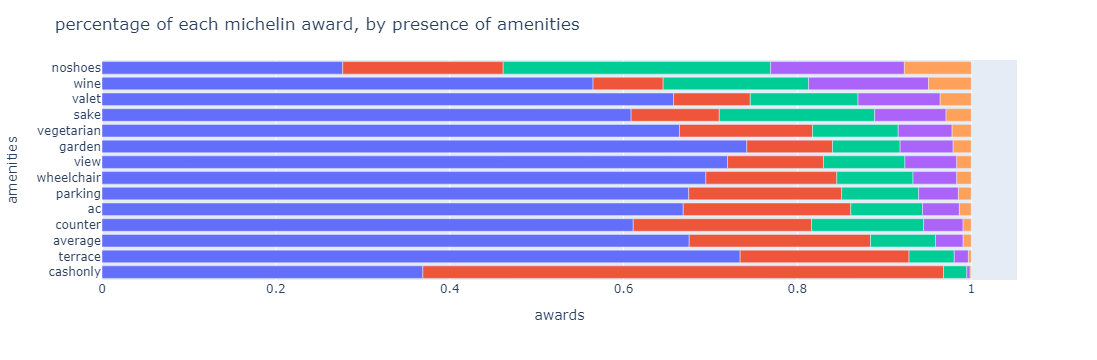

In [20]:
fig_H

In [28]:
print(len(michelin))

15520


In [29]:
michelin.columns

Index(['Name', 'Address', 'Location', 'Price', 'Cuisine', 'Longitude',
       'Latitude', 'Url', 'Award', 'GreenStar', 'FacilitiesAndServices',
       'Description', 'ac', 'wheelchair', 'parking', 'garden', 'wine',
       'terrace', 'valet', 'vegetarian', 'counter', 'view', 'noshoes',
       'cashonly', 'sake', 'Cuisine1', 'Cuisine2', 'bib_gourmand',
       'description_sentiment', 'Award_ordinal', 'proportion_amenities',
       'amenities_sum', 'amenities_cuts', 'sentiment_cuts', 'Country', 'City',
       'Alpha_3'],
      dtype='object')

In [ ]:
-counter    -
-wheelchair -
-vegetarian -
-wine       -
-view       -
-garden     -
-valet      -
-cashonly   -
-parking    -
-ac         -
-garden     -
-noshoes    -
-sake       -
-terrace    -

In [ ]:
# path = "https://raw.githubusercontent.com/ua-chjb/michelin_stars/refs/heads/main/data/michelin_by_Jerry_Ng.csv"

# codecs = ['utf8','ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
#           'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
#           'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
#           'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
#           'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
#           'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
#           'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
#           'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']

# seps = [";", ",", " ", "\t", "\r", "\s"]

# def open_data(path):
#     for encoding in codecs:
#         for sep in seps:
#             try:
#                 with open(path, "r", encoding="utf8") as f:
#                     file = pd.read_csv(f)
#                     print(file.head())
#                     print(file.info())
#                 return file
#             except:
#                 print("cannot read with type", encoding, "and sep", sep)

# michelin = open_data(path)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def summary_dataframe_small(df):

	return pd.DataFrame({'features': df.columns,'dtypes': [df.dtypes[i] for i in range(len(df.columns))],
	'nulls':[df[df.columns[i]].isnull().sum() for i in range(len(df.columns))],'nonnuls / 1.0': (df.shape[0] - 
	df.isnull().sum().values) / df.shape[0],'uniques': [df[j].nunique() for j in df.columns]})

summary_dataframe_small(michelin)

In [ ]:
michelin = michelin.drop(["PhoneNumber", "WebsiteUrl"], axis=1)

In [ ]:
# add in corr with dep?

def summary_dataframe_large(df):
    
    summary = pd.DataFrame({
        "feature": df.columns,
        "dtype" : [str(df[col].dtype) for col in df.columns],
        "nulls": [f"{df[col].isnull().sum()}" for col in df.columns],
        "nonnulls%": [f"{round(((1 - df[col].isnull().sum() / len(df)) * 100), 2)}%" for col in df.columns],
        "STATS": ["|" for col in df.columns],
        "min": [df[col].min().round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " " for col in df.columns],
        "50%": [df[col].median().round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " "
                for col in df.columns],
        "max": [df[col].max().round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " " for col in df.columns],
        "stdev": [df[col].std().round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " " for col in df.columns],
        "mean": [df[col].mean().round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " " for col in df.columns],
        # "skew": ["left" if df[col].median() > df[col].mean() else "right" if df[col].median() < df[col].mean() else "equal" if df[col].median()==df[col].mean() if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else " " for col in df.columns],
        "cat_mode": [" " if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else df[col].mode()[0] for col in df.columns],
        "COUNTS": ["|" for col in df.columns],
        "nuniques": [df[col].nunique() for col in df.columns],
        "vcs-": [df[col].value_counts().reset_index()["count"].min() for col in df.columns],
        "vcs+": [df[col].value_counts().reset_index()["count"].max() for col in df.columns],
        "RANDOM": ["|" for col in df.columns],
        "row[random]" :[df[col].iloc[np.random.randint(len(df))].round(2) if any(t in str(df[col].dtype) for t in ("float", "int", "time")) else df[col].iloc[np.random.randint(len(df))] for col in df.columns],
    })

    return summary
    
summary = summary_dataframe_large(michelin)
summary

In [ ]:
# conditional boolean columns from single string description

michelin["ac"] = [1 if "Air" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["wheelchair"] = [1 if "Wheelchair" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["parking"] = [1 if "Car" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["garden"] = [1 if "Garden" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["wine"] = [1 if "wine" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["terrace"] = [1 if "Terrace" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["valet"] = [1 if "Valet" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["vegetarian"] = [1 if "vegetarian" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["counter"] = [1 if "Counter" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["view"] = [1 if "view" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["noshoes"] = [1 if "Shoes" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["cashonly"] = [1 if "Cash" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

michelin["sake"] = [1 if "sake" in str(j) else 0 for j in michelin["FacilitiesAndServices"].values]

In [ ]:
michelin[:3]

In [ ]:
# clean and split cuisine feature
# # keep original combined feature

cuis = [str(q).replace(" ", ",") for q in michelin["Cuisine"]]
cuis = [str(w).replace(",,", ",") for w in cuis]
cuis = [str(s).replace(",", ", ").lower() for s in cuis]
michelin["Cuisine"] = cuis
michelin["Cuisine1"] = [j.split(", ")[0].lower() for j in michelin["Cuisine"]]
michelin["Cuisine2"] = [j.split(", ")[-1].lower() for j in michelin["Cuisine"]]


In [ ]:
len(michelin["Name"].unique())

In [ ]:
# instances of string "cuisine" in text, rather than specific category
cuis_repl = [j.replace("cuisine", "") for j in michelin["Cuisine2"]]
michelin["Cuisine2"] = cuis_repl

In [ ]:
michelin[:3]

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('movie_reviews')

In [ ]:
# continuous, numerical 1: sentiment of review

def sentiment_analyzer(df, col):
    
    sia = SentimentIntensityAnalyzer()

    scores = [sia.polarity_scores(str(text)) for text in df[str(col)]]

    scores_comp = []

    for score in range(len(scores)):
        scores_comp.append(scores[score]['compound'])
    
    return scores_comp

review_scores = sentiment_analyzer(michelin, "Description")
michelin["description_sentiment"] = review_scores

In [ ]:
michelin["Award"].value_counts()

In [ ]:
# ordinal, numerical 2 [dependent variable]: award.

award_dict = {
    "Selected Restaurants": 1,
    "Bib Gourmand": 2,
    "1 Star": 3,
    "2 Stars": 4,
    "3 Stars": 5
}

michelin["Award_ordinal"] = michelin["Award"].map(award_dict)

In [ ]:
# set flag for "bib gourmand", as this is "somewhat of" a separate category

michelin["bib_gourmand"] = np.zeros(len(michelin))
michelin["bib_gourmand"][michelin["Award"]=="Bib Gourmand"] = 1

In [ ]:
# continuous, numerical 3, proportion of amenities

onehot_cols = [ "ac",	"wheelchair", "parking", "garden",	"wine",	"terrace", "valet", "vegetarian", "counter", "view",
           "noshoes", "cashonly", "sake"]

michelin_onehot = michelin[onehot_cols]

michelin_onehot = michelin[onehot_cols]
michelin_onehot["sum"] = michelin_onehot.sum(axis=1)
michelin_onehot["proportion"] = michelin_onehot["sum"] / (len(michelin_onehot.columns)-1)
michelin_onehot[:5]
michelin["proportion_amenities"] = michelin_onehot["proportion"]

In [ ]:
michelin["Price"].unique()

In [ ]:
# found instance of MNAR nan, turned to 0 as there there is no indication of price but there does appear to be a "home cooking" vibe to the description.
# entry is notable as it won the top award

michelin["Price"] = michelin["Price"].replace(np.nan, "")

In [ ]:
michelin["Price"].unique()

In [ ]:
# ordinal, numerical 4

lens = [len(str(l)) for l in michelin["Price"].unique()]
prices = michelin["Price"].unique()
price_dict = dict(zip(prices, lens))

price_dict

In [ ]:
# map price dictionary to price feature

michelin["Price"] = michelin["Price"].map(price_dict)

In [ ]:
michelin["Price"].unique()

In [ ]:
# amenities count feature

michelin["amenities_sum"] = (michelin["proportion_amenities"] * 13).astype(int)

# amenities cuts

michelin["amenities_cuts"] = pd.cut(michelin["amenities_sum"], 10, labels=["".join(["buck_", str(k)]) for k in range(10)])

# sentiment cuts

michelin["sentiment_cuts"] = pd.cut(michelin["description_sentiment"], 10, labels=["".join(["buck_", str(k)]) for k in range(10)])

In [ ]:
# "MNAR" 0s  in "description sentiment" feature, replace with mean of below columns

fillnans_cols = ["Price", "GreenStar", "ac", "wheelchair", "parking", "garden", "wine", "terrace", "valet", "vegetarian", "counter", "view", "noshoes", "cashonly", "sake", "Award_ordinal", "Cuisine1", "Cuisine2"]
michelin["description_sentiment"] = michelin["description_sentiment"].replace(0, np.nan)

michelin["description_sentiment"] = michelin.groupby(fillnans_cols)["description_sentiment"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# take stock of all feauters

michelin[:3]

In [ ]:
def heatmap_allfeatures_pearson(df, height=800, colors="RdBu_r"):

    df = df.select_dtypes(["number"])
    
    corr = df.corr().round(2)
    mask = np.zeros_like(df.corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr = corr.mask(mask)
    
    g = px.imshow(corr, text_auto=True, color_continuous_scale=colors, zmin=-1, zmax=1)
    
    g.update_layout(
    { "template": "plotly_white", 
     "title": "heatmap, pearson correlation",
    "xaxis":{"showgrid": False,
             "zeroline": False},
    "yaxis": {"showgrid": False,
             "zeroline": False},
     "height": height,
   }).update_traces(xgap=5,ygap=5)
    
    return g, corr

fig, corr = heatmap_allfeatures_pearson(michelin, height=800, colors=px.colors.diverging.RdYlBu)
fig

In [ ]:
# clean "location" column
michelin["City"] = [j.split(",")[0] for j in michelin["Location"]]
michelin["Country"] = [j.split(",")[-1] for j in michelin["Location"]]

In [ ]:
# strip trailing spaces
michelin["Country"] = michelin["Country"].str.strip()

# after debugging, find countries with oddball names and replace with standards
country_dict = {
    "China Mainland": "China",
    "Czech Republic": "Czechia",
    "Hong Kong SAR China": "Hong Kong",
    "South Korea": "Korea, Republic of",
    "Taiwan": "Taiwan, Province of China",
    "USA": "United States",
    "Vietnam": "Viet Nam",
    "Abu Dhabi": "United Arab Emirates",
    "Dubai": "United Arab Emirates",
    "Macau": "Macao",
}

michelin["Country"] = michelin["Country"].replace(country_dict)

# create dictionary of pycountry standard 
import pycountry

codes_dict = {}

for py_c in pycountry.countries:
    codes_dict[py_c.name] = {
        "two": py_c.alpha_2,
        "three": py_c.alpha_3,
    }

# add column of pycountry standard
michelin["Alpha_3"] = [codes_dict[j]["three"] for j in michelin["Country"]]

In [ ]:
michelin[michelin["description_sentiment"]==0]

In [ ]:
def big_bar_percentage(df):
    onehot_cols = [ 
                "ac",	
                "wheelchair", 
                "parking", 
                "garden",	
                "wine",	
                "terrace", 
                "valet", 
                "vegetarian", 
                "counter", 
                "view",
                "noshoes", 
                "cashonly", 
                "sake"
                ]

    # define function for pivot of bar_percentage chart
    def pivot_table_from_count(df1, x, y):

        gb = df1.groupby([x, y]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :3]
        pivot = gb.pivot(columns=x, index=y)
        pivot.columns = pivot.columns.droplevel()
        
        pivot["sum"] = pivot.sum(axis=1)
        
        for col in pivot.columns:
            for s in pivot.index:
                pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

        pivot.index = ["".join([y, str(0)]), y]
        
        return pivot.drop(["sum"], axis=1).drop("".join([y, str(0)]), axis=0)
        
    # combine data for of bar_percentage chart     
    onehot_barchart_dict = {}
    for onehot in onehot_cols:
        try:
            onehot_barchart_dict[onehot] = pivot_table_from_count(df, "Award", onehot)
        except:
            pass

    onehot_big_df = pd.concat(onehot_barchart_dict.values())
    onehot_big_df = onehot_big_df.T[::-1].T

    onehot_big_df = onehot_big_df[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]
    x = "Award"
    df = michelin # why is this here

    gb = michelin.groupby([x]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :2]
    pivot = gb.set_index("Award").T

    pivot["sum"] = pivot.sum(axis=1)

    # turn to percentage of data
    for col in pivot.columns:
        for s in pivot.index:
            pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

    pivot = pivot.T.rename(columns={"count": "average"}).T

    pivot = pivot.drop(["sum"], axis=1)

    pivot = pivot[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]

    # finalize full data in proper format, concatenated with "average" feature
    onehot_big_pivot = pd.concat([onehot_big_df, pivot])
    onehot_big_pivot = onehot_big_pivot.sort_values(by=["3 Stars"], ascending=True)

    return onehot_big_pivot

onehot_big_pivot = big_bar_percentage(michelin)

def bar_percentage_from_pivot(pivot, title="percentage of each michelin award, by presence of amenities", x_title="awards", y_title="amenities", colors=c5_list):
    return px.bar(pivot, x=pivot.columns, y=pivot.index, color_discrete_sequence=colors).update_layout({
        "title": title, "xaxis": {"title": x_title}, "yaxis": {"title": y_title},
        "legend" : {"visible": False}
    })

fig_H = bar_percentage_from_pivot(onehot_big_pivot)

In [ ]:
# create groupby for geo data

def groupby_three_cunts(df, x, z1, z2, z3, meas1="min", meas2="mean", meas3="max"):
    return df.groupby([x]).agg({z1: ["count", meas1, meas2, meas3], z2: [meas1, meas2, meas3], z3: [meas1, meas2, meas3]}).reset_index()

gb = groupby_three_cunts(michelin, "Alpha_3", "description_sentiment", "Award_ordinal", "proportion_amenities", meas1="min", meas2="mean", meas3="max")
gb[:5]

In [ ]:
geojson = "https://raw.githubusercontent.com/johan/world.geo.json/refs/heads/master/countries.geo.json"

def geo_better(gb, geojson, gb_location_column, z_upper, z_lower, height=500, width=700, colors=px.colors.diverging.RdYlBu):

    
    with urlopen(geojson) as response:
        countries = json.load(response)
    
    
    
    trace = go.Choroplethmap(geojson=geojson, 
                             locations=gb[gb_location_column], 
                             z=gb[(z_upper, z_lower)],
                             colorscale=colors, 
                             marker={"line": {"width": 0.001, "color": "white"}}
                              )
    return go.Figure([trace]).update_layout({"height": 500, "width": 800})

z1 = "description_sentiment"
z2 = "Award_ordinal"
z3 = "proportion_ameneties"

z1_lower_count = "count"
z_lower_min = "min"
z_lower_mean = "mean"
z_lower_max = "max"

fig = geo_better(gb, geojson, "Alpha_3", z1, z_lower_mean, colors=px.colors.sequential.Blues)
fig

In [ ]:
# x: sum up onehot columns and create feature that shows % of ameneties
# y: sentiment of review, mean
# z: awards on ordinal scale

In [ ]:
parcats1 = ["GreenStar", "ac",	"wheelchair", "parking", "garden",	"wine",	"terrace", "valet", "vegetarian", "counter", "view",
           "noshoes", "cashonly", "sake", "Award"]

In [ ]:
parcats1 = ["GreenStar", "ac",	"wheelchair", "parking", "garden",	"wine",	"terrace", "valet", "vegetarian", "counter", "view",
           "noshoes", "cashonly", "sake", "Award", "Award_ordinal"]

px.parallel_categories(michelin[parcats1], color="Award_ordinal").update_layout({"height": 550, "width": 1050})

In [ ]:
parcats2 = ["Country", "Cuisine", "Cuisine1", "Cuisine2", "Award_ordinal"]

In [ ]:
px.parallel_categories(michelin[parcats2], color="Award_ordinal").update_layout({"height": 900})

In [ ]:
import plotly.express as px

def scatter_3d_simple(df, x, y, z, meas1="count", meas2="mean", symbol="circle", size=1, opacity=0.5, colors=px.colors.sequential.Purples, height=650, width=1050):
    
    gb = df.groupby([x, y]).agg({z: [meas1, meas2]}).reset_index()
    gb.columns = [x, y, meas1, meas2]
    
    fig = px.scatter_3d(x=gb[x], 
                  y=gb[y], 
                  z=gb[meas2], 
                  color=gb[meas1], 
                  size=gb[meas1],
                  opacity=opacity,
                  symbol_sequence=[symbol],
                  color_continuous_scale=colors
                 ).update_traces({"marker": {"line": {"width": 0}, "size": [h * size for h in gb[meas1]]}})

    return gb, fig.update_layout({"title": {"text": f"{x}, {y}, and {z}, by {meas2} and {meas1}", "x": 0.5}, "height": height, "width": width,
                             "scene": {"xaxis": {"title": f"{x}"},
                                       "yaxis": {"title": f"{y}"},
                                       "zaxis": {"title": f"{z}"}}
                             })

gb, fig = scatter_3d_simple(michelin,"description_sentiment", "wine", "Award_ordinal", "count", "mean", symbol="circle", size=10, opacity=0.3, colors=px.colors.sequential.Oryel, height=650, width=650)

fig

In [ ]:
fig, corr = heatmap_allfeatures_pearson(michelin, height=800, colors=px.colors.diverging.RdYlBu)
fig

In [ ]:
garbage_cols = ["Url", "FacilitiesAndServices",]
michelin[:3]

In [ ]:


def histogram_overview(df, max_cols=4, height=500, color=px.colors.qualitative.T10):
    
    max_rows=ceil(float(len(df.columns))/max_cols)
    fig = make_subplots(
        rows=max_rows, 
        cols=max_cols,
        subplot_titles=df.columns,).update_layout(
        {"title":"histograms of features"})
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(color))
    row=1
    
    for j in df.columns:
        col = next(col_cyc)
        fig.add_histogram(
            x=df[j].values,
            row=row, 
            col=col, 
            name=j,
            marker={"color": next(color_list)}
            
        ).update_layout({"height": height})
        if col % max_cols == 0:
            row+=1
        
    return fig

hist_cols_to_drop = ["Cuisine", "Name", "Address", "Price", "Location", "Url", "FacilitiesAndServices", "Description"]
michelin_hist = michelin.drop(hist_cols_to_drop, axis=1)

fig = histogram_overview(michelin_hist, max_cols=3, height=3600, color=px.colors.sequential.Oryel)
fig

In [ ]:
continuous = ["Longtitude", "Latittude", "description_sentiment", "proportion_amenities"]

# pie chart for categoricals
def pie_categoricals(df, categoricals, max_cols=6, colorscale=px.colors.qualitative.T10, height=650, width=1050):
    
    max_rows=ceil(float(len(df[categoricals].columns))/max_cols)
    
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        specs=[
            [{"type":"pie"} for h in range(max_cols)] for j in range(max_rows)       
              ],
    
        subplot_titles=df[categoricals].columns
    ).update_layout(
        {"title":f"pies of categorical features"})
    
    pies = [df.groupby(j).count().iloc[::, 0].reset_index().rename(columns={str(df.columns[0]):"count"}) for j in categoricals]
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = colorscale
    
    row=1
    
    pies = [df.groupby(j).count().iloc[::, 0].reset_index().rename(columns={str(df.columns[0]):"count"}) for j in categoricals]
    
    
    for j in range(len(pies)):
        col = next(col_cyc)
        fig.add_pie(
            labels=pies[j].iloc[::, 0].values,
            values=pies[j].iloc[::, 1].values,
            row=row, col=col,
            showlegend=False,
            name=categoricals[j],
        ).update_traces(marker={"colors": color_list},
                       textinfo="none")
        if col % max_cols == 0:
            row+=1    
    
    return fig.update_layout({"height": height, "width":width})

pie_cols_to_drop = ["Longitude", "Latitude", "description_sentiment", "proportion_amenities","Name", "Address", "Price", "Location", "Description", "Country", "City", "Cuisine"]

michelin_pie = michelin.drop(garbage_cols, axis=1)
michelin_pie = michelin_pie.drop(pie_cols_to_drop, axis=1)
categoricals = michelin_pie.columns

fig = pie_categoricals(michelin_pie, categoricals, max_cols=5, colorscale=px.colors.sequential.gray[5:], width=1050, height=1200)

fig

In [ ]:
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot

from math import ceil
from itertools import cycle


def continuous_bars_by_categorical(df, categoricals, categorical_sliceable, continuous_dep=None, max_cols=4, height=500, color=px.colors.qualitative.T10):
    # bar charts of one categorical, measured by all other continuous variables.
    
    print(f"Categorical variables are {categoricals}, dependent variable is [{continuous_dep}]")
    
    # separate function
    
    cs = [f for f in categoricals if f != categorical_sliceable]
    df = df.drop(cs, axis=1)

    # keep this the same

    max_rows=ceil(float(len(df.columns))/max_cols)
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        subplot_titles=df.columns).update_layout(
        {"title":f"bars of {categorical_sliceable}, cut by all other features"})
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(color[:len(df[categorical_sliceable].unique())]))
    
    row=1
    ctr=0
    
    for j in df.columns:
        col = next(col_cyc)
        for attr in df[categorical_sliceable].unique():
            if j == categorical_sliceable == continuous_dep:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[categorical_sliceable]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": color[-1]},
                    showlegend=False
                )
                
            
            elif j == categorical_sliceable and j != continuous_dep:
                if ctr < 1:
                    ctr += 1
                    fig.add_histogram(
                        x=df[j],
                        row=row,
                        col=col,
                        name=j,
                        marker={"color": color[len(df[j].unique())+1]},
                        showlegend=False
                    )
                else:
                    pass

            elif j == continuous_dep and j != categorical_sliceable:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[categorical_sliceable]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": color[-1]},
                    showlegend=False
                    
                )

            else:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[categorical_sliceable]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": next(color_list)},
                    showlegend=False        
                )


        if col % max_cols == 0:
            row+=1

    return fig.update_layout({"height": height,
                             "barcornerradius": 1,
                              "bargap":0.7
                             })

categoricals = michelin_pie.columns
michelin_bars = michelin.drop(["Url", "FacilitiesAndServices", "Description", "Country", "City", "Name", "Address", "Location", "Cuisine"], axis=1)

g = continuous_bars_by_categorical(michelin_bars, categoricals=categoricals, categorical_sliceable="Award", continuous_dep="Award_ordinal", max_cols=3, height=800, color=px.colors.sequential.Oryel)
g

In [ ]:
# michelin.drop(categoricals, axis=1).drop(["Url", "FacilitiesAndServices", "Description", "Country", "City", "Name", "Address", "Location", "Cuisine"], axis=1)

In [ ]:
categoricals = [f for f in categoricals]

In [ ]:
categoricals.append("Price")

In [ ]:
def examine_categorical_by_categoricals(df, categoricals, sliceable, max_cols=4, height=700):
    # bar chart of each categorical, count(), grouped by sliceable

    print(f"Categorical variables are {categoricals}")

    df = df[categoricals]
    
    max_rows=ceil(float(len(df.columns))/max_cols)
    
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        subplot_titles=df.drop([sliceable], axis=1).columns).update_layout(
        {"title":f"bars of features, slice by {sliceable}"})
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(px.colors.qualitative.T10[:len(df[sliceable].unique())]))
    
    row=1
    ctr=0

    for j in df.drop([sliceable], axis=1).columns:
        col = next(col_cyc)
        for attr1 in df[j].unique():
            if ctr < 1:
                for attr2 in df[sliceable].unique():
                    fig.add_bar(
                        x = [attr1],
                        y = [df[j][(df[j]==attr1) & (df[sliceable]==attr2)].count()],
                        row=row,
                        col=col,
                        marker={"color": next(color_list)},         
                        name=str(attr2),
                        showlegend=True
                        )
            else:
                for attr2 in df[sliceable].unique():
                    fig.add_bar(
                        x = [attr1],
                        y = [df[j][(df[j]==attr1) & (df[sliceable]==attr2)].count()],
                        row=row,
                        col=col,
                        marker={"color": next(color_list)},         
                        name=str(attr2),
                        showlegend=False
                        )
            ctr+=1

        if col % max_cols == 0:
            row+=1
            
    return fig.update_layout({"height": height,
                              "barcornerradius": 1,
                              "bargap": 0.0005,
                              "barmode":"group",
                              "legend": {"title": sliceable}
                             })
        
examine_categorical_by_categoricals(michelin, categoricals=categoricals, sliceable="Award", max_cols=3, height=1200)

In [ ]:
def heatmap_pearson_onefeature(df, dep, width, color="RdBu_r"):

    df = df.select_dtypes(["number"])
    
    corr = df.corr().round(2)
    corr = corr[[dep]].drop([dep], axis=0)
    
    g = px.imshow(corr.T, text_auto=True, color_continuous_scale=color, zmin=-1, zmax=1)
    
    g.update_layout(
    {"template": "plotly_white",
     "width": width,
     "title": f"heatmap, pearson correlation with {dep}",
     "xaxis": {"showgrid": False,
              "zeroline": False},
     "yaxis": {"showgrid": False,
              "zeroline": False}
   }).update_traces(xgap=5,ygap=5)
    return g, corr

fig, corr= heatmap_pearson_onefeature(michelin, dep="Award_ordinal", width=1050, color=px.colors.diverging.RdYlBu_r)
fig

In [ ]:
michelin.dtypes
scatter_cols = ["Price", "Longitude", "Latitude", "Award_ordinal", "description_sentiment", "proportion_amenities", "GreenStar"]

In [ ]:
def scatters_continuous(df, color=None, opacity=0.5, max_cols=4, height=2000):

    print(f"Features analysed are {df.columns}")

    check_list1 = []
    for j in df.columns:
        for h in df.columns:
            if j != h:
                if (j, h) not in check_list1:
                    if (h, j) not in check_list1:
                        check_list1.append((j, h))    
        
    max_rows=ceil(float(len(check_list1))/max_cols)
        
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        subplot_titles=[", ".join([q, a]) for (q, a) in check_list1]
    )
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(px.colors.qualitative.T10))
    
    row=1
    
    check_list2 = []
    for j in df.columns:
        for h in df.columns:
            if j != h:
                if (j, h) not in check_list2:
                    if (h, j) not in check_list2:
                        check_list2.append((h, j))
                        col = next(col_cyc)
                        fig.add_scatter(
                            x=df[j], 
                            y=df[h], 
                            row=row, 
                            col=col,
                            showlegend=False,
                            name=", ".join([str(j), str(h)]),
                            mode="markers",
                            marker={"color": next(color_list), "opacity": opacity}
                        ).update_layout({"title": f"{j} by {h}", 
                                        "xaxis": {"title": j},
                                        "yaxis": {"title": h}})
        
                        if col % max_cols == 0:
                            row+=1

    return fig.update_layout({"title": f"scatter plots, all features by all features", "height": max_rows*300, "width":1000}), check_list1

michelin.dtypes
scatter_cols = ["Price", "Longitude", "Latitude", "Award_ordinal", "description_sentiment", "proportion_amenities", "GreenStar"]
michelin_scatter = michelin[scatter_cols]

fig, check_list1 = scatters_continuous(michelin_scatter, opacity=0.01, color="Award_ordinal", max_cols=2)

In [ ]:
# fig

In [ ]:
# def box_similar(df, cols, colors=px.colors.qualitative.T10, height=400, width=1200):

#     print("features in this chart are: ", cols)
    
#     color_list = cycle(iter(colors))
    
#     traces = []
    
#     for j in cols:
#         trace = go.Box(
#             y=df[j],
#             name=j,
#             notched=True,
#             marker={"color": next(color_list)}        
#         )
#         traces.append(trace)
    
#     return go.Figure(traces).update_layout({"title": "boxplot of similar features", "height": height,"width": width})

# box_similar(michelin, cols=boxplot_cols, colors=px.colors.cyclical.mygbm, height=400, width=1000)

In [ ]:
df = michelin
x = "Cuisine1"
y = "Award_ordinal"
colors = px.colors.cyclical.mygbm

def box_single_categorical_rainbow(df, x_categorical, y_continuous, colors, height, width):
    
    color_iter = cycle(iter(colors))
    
    traces = []
    
    for k in df[x_categorical].unique():
        trace = go.Box(
            x = df[df[x_categorical]==k][x_categorical],
            y = df[df[x_categorical]==k][y_continuous],
            marker={"color": next(color_iter)},
            name=x,
            showlegend=False
        )
    
        traces.append(trace)
    
    return go.Figure(traces).update_layout({"title": f"box and whiskers of {x_categorical} by {y_continuous}",
                                            "height": height,
                                            "width": width})

box_single_categorical_rainbow(michelin, "Price", "Award_ordinal", colors=px.colors.cyclical.mygbm, height=650, width=1050)

In [ ]:
# def pivot_table_from_count(df, x, y):

#     gb = michelin.groupby([x]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :3]
#     pivot = gb.pivot(columns=x, index=y)
#     pivot.columns = pivot.columns.droplevel()
    
#     pivot["sum"] = pivot.sum(axis=1)
    
#     for col in pivot.columns:
#         for s in pivot.index:
#             pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

#     pivot.index = ["".join([y, str(0)]), y]
    
#     return pivot.drop(["sum"], axis=1).drop("".join([y, str(0)]), axis=0)

In [ ]:
onehot_cols = [ 
               "ac",	
               "wheelchair", 
               "parking", 
               "garden",	
               "wine",	
               "terrace", 
               "valet", 
               "vegetarian", 
               "counter", 
               "view",
               "noshoes", 
               "cashonly", 
               "sake"
              ]

In [ ]:
# define function for pivot

def pivot_table_from_count(df, x, y):

    gb = michelin.groupby([x, y]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :3]
    pivot = gb.pivot(columns=x, index=y)
    pivot.columns = pivot.columns.droplevel()
    
    pivot["sum"] = pivot.sum(axis=1)
    
    for col in pivot.columns:
        for s in pivot.index:
            pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

    pivot.index = ["".join([y, str(0)]), y]
    
    return pivot.drop(["sum"], axis=1).drop("".join([y, str(0)]), axis=0)

In [ ]:
# call function for all these count variables

onehot_cols = [ 
               "ac",	
               "wheelchair", 
               "parking", 
               "garden",	
               "wine",	
               "terrace", 
               "valet", 
               "vegetarian", 
               "counter", 
               "view",
               "noshoes", 
               "cashonly", 
               "sake"
              ]
# define function for pivot

def pivot_table_from_count(df, x, y):

    gb = michelin.groupby([x, y]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :3]
    pivot = gb.pivot(columns=x, index=y)
    pivot.columns = pivot.columns.droplevel()
    
    pivot["sum"] = pivot.sum(axis=1)
    
    for col in pivot.columns:
        for s in pivot.index:
            pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

    pivot.index = ["".join([y, str(0)]), y]
    
    return pivot.drop(["sum"], axis=1).drop("".join([y, str(0)]), axis=0)
    
onehot_barchart_dict = {}
for onehot in onehot_cols:
    onehot_barchart_dict[onehot] = pivot_table_from_count(michelin, "Award", onehot)

onehot_big_df = pd.concat(onehot_barchart_dict.values())
onehot_big_df = onehot_big_df.T[::-1].T

#order cols
onehot_big_df = onehot_big_df[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]

# add in average dataframe

x = "Award"
df = michelin

gb = michelin.groupby([x]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :2]
pivot = gb.set_index("Award").T

pivot["sum"] = pivot.sum(axis=1)

for col in pivot.columns:
    for s in pivot.index:
        pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

pivot = pivot.T.rename(columns={"count": "average"}).T

pivot = pivot.drop(["sum"], axis=1)

# order cols
pivot = pivot[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]

onehot_big_df = pd.concat([onehot_big_df, pivot])
onehot_big_df = onehot_big_df.sort_values(by=["3 Stars"], ascending=True)

onehot_big_df

In [ ]:
pivot

In [ ]:
# add in average dataframe

x = "Award"
df = michelin

gb = michelin.groupby([x]).count().reset_index().rename(columns={df.columns[0]: "count"}).iloc[::, :2]
pivot = gb.set_index("Award").T

pivot["sum"] = pivot.sum(axis=1)

for col in pivot.columns:
    for s in pivot.index:
        pivot.loc[s, col] = (pivot.loc[s, col] / pivot.loc[s, "sum"])

pivot = pivot.T.rename(columns={"count": "average"}).T

pivot = pivot.drop(["sum"], axis=1)

# order cols
pivot = pivot[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]]

In [ ]:
# concat big dataframe with averages
onehot_big_df = pd.concat([onehot_big_df, pivot])
onehot_big_df = onehot_big_df.sort_values(by=["3 Stars"], ascending=True)

In [ ]:
onehot_big_df

In [ ]:

def bar_percentage_from_pivot(pivot, title, x_title=pivot.columns.name, y_title=pivot.index.name, colors=px.colors.sequential.Oryel, height=650, width=1050):
    return px.bar(pivot, x=pivot.columns, y=pivot.index, color_discrete_sequence=colors).update_layout({
        "title": title, "height": height, "width": width, "xaxis": {"title": x_title}, "yaxis": {"title": y_title},
        "legend" : {"visible": False}
        # {"orientation": "h", "yanchor": "bottom", "y": 1.00, "xanchor": "right", "x": 1.00}
    })
#     fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="right",
#     x=1
# ))

bar_percentage_from_pivot(onehot_big_df, title="percentage of each michelin award, by presence of amenities", y_title="amenities", height=650, width=1050)

In [ ]:
fig, corr = heatmap_allfeatures_pearson(michelin, height=800, colors=px.colors.diverging.RdYlBu_r)
fig

In [ ]:
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from scipy import stats

def scatter_bands(x, y, conf=0.95, colors=px.colors.qualitative.T10, opacity=0.5, height=650, width=1050):

    # sort x and y
    list_of_tuples = [(a,b) for a,b in zip(x, y)]
    list_of_sorted_tuples = sorted(list_of_tuples, key=lambda j: j[0])
    x_arr = np.asarray([a[0] for a in list_of_sorted_tuples])
    y_arr = np.asarray([b[1] for b in list_of_sorted_tuples])

    # linear regression model
    model = LinearRegression()
    model.fit(x_arr.reshape(-1, 1), y_arr)
    y_hat = model.predict(x_arr.reshape(-1, 1))

    # figures needed for inferential statistics
    n = x_arr.size
    m = len(x_arr.shape)
    dof = n - m
    t = stats.t.ppf(conf, dof)

    resid = y_arr - y_hat
    se = np.sqrt(np.sum(resid**2) / dof)

    ci = t * se * np.sqrt(1/n + (x_arr - np.mean(x_arr))**2 / np.sum((x_arr - np.mean(x_arr))**2))
    pi = t * se * np.sqrt(1 + 1/n + (x_arr - np.mean(x_arr))**2 / np.sum((x_arr - np.mean(x_arr))**2))

    pi2 = np.linspace(pi.min(), pi.max(), 100)
    x2 = np.linspace(x_arr.min(), x_arr.max(), 100)
    y_hat2 = np.linspace(y_hat.min(), y_hat.max(), 100)

    # scatterplot with ci // pi bands
    ff = go.Figure()

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_arr,
            mode="markers",
            marker={"color": colors[0], "opacity": opacity},
            name="restaurants"
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat+ci,
            mode="lines",
            line={"color": colors[2], "width": 0},
            name="upper ci band limit",
            showlegend=False
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat-ci,
            mode="lines",
            line={"color": colors[2], "width": 0},
            name=f"{round(conf * 100)}% confidence interval   ",
            fill="tonexty",
            fillcolor=colors[2]
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x2,
            y=y_hat2+pi2,
            mode="lines",
            line={"color": colors[3], "width": 1, "dash": "dash"},
            name=f"{round(conf*100)}% prediction interval",
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x2,
            y=y_hat2-pi2,
            mode="lines",
            line={"color": colors[3], "width": 1, "dash": "dash"},
            name="lower pi band limit",
            showlegend=False
        )
    )

    ff.add_trace(
        go.Scatter(
            x=x_arr,
            y=y_hat,
            mode="lines",
            line={"color": colors[1]},
            name="linear model",
        )
    )
    
    # ff.update_layout(
    #     dict(
    #         plot_bgcolor="#1e1e1e",
    #         paper_bgcolor="#111111",
    #         font={"family": "Lato", "color": "#979797"},
    #         title=dict(
    #             x=0.5,
    #             text=f"{y.name.title()} by {x.name.title()}",
    #             font={"size": 28.5, "color": "white"}
    #             )
    #         ),
    #         legend=dict(
    #             title=dict(
    #                 text="<b>Variables</b>"
    #             ),
    #             x=0.01,
    #             y=0.97,
    #             bgcolor="#292929",
    #             traceorder="normal",
    #             font={"color":"#e1e1e1"}
    #             ),
    #         xaxis=dict(
    #             title=dict(
    #                 text=x.name.title()
    #             ),
    #             gridcolor="#202020",
    #             gridwidth=10,
    #             range=[0, x.max()+(x.max()//20)],
    #             zeroline=False
    #         ),
    #         yaxis=dict(
    #             title=dict(
    #                 text=y.name.title()
    #             ),
    #             gridcolor="#202020",
    #             gridwidth=10,
    #             range=[0, y.max()+(y.max()//20)],
    #             zeroline=False
    #         )
    #     )
    return ff.update_layout({"title": f"confidence interval and prediction interval, {x.name} and {y.name}",
                           "height": height,
                            "width": width,
                            "xaxis":{"title": f"{x.name}"},
                            "yaxis": {"title": f"{y.name}"}})

mask = (michelin["bib_gourmand"]!=1)

x = michelin['Price'][mask]
y = michelin['Award_ordinal'][mask]

fig = scatter_bands(x, y, conf=0.95,  colors=px.colors.sequential.Sunset[::-1], opacity=0.01, height=650, width=1150)
fig

In [ ]:
# begin charts

In [ ]:
##### pie charts done

In [ ]:
def count_groupby_one_dimensional(df, name):
    return df.groupby([name]).count().iloc[::, :1].rename(columns={"Name": "count"}).reset_index()

In [ ]:
def pie_final(gb, name, sort=False, textposition=None, title=None, legend_title=None, colors=None):
    
    return px.pie(gb, values="count", names=name, color_discrete_sequence=colors).update_traces(sort=sort, textposition=textposition).update_layout({
        "title": {"text": title, "x": 0.5}, "legend": {"title": legend_title}
    })

In [ ]:
# K
pie_final(count_groupby_one_dimensional(michelin, "sentiment_cuts"), "sentiment_cuts", sort=False, textposition=None, title="sentiment composition", legend_title="legend", colors=px.colors.sequential.Oryel)

In [ ]:
# M -> still need filtered dataframe

pie_final(count_groupby_one_dimensional(michelin, "Award"), "Award", sort=None, textposition=None, title="awards composition", legend_title="legend", colors=px.colors.sequential.Oryel)

In [ ]:
# G

pie_final(count_groupby_one_dimensional(michelin, "Price"), "Price", sort=False, textposition=None, title="price composition", legend_title="legend", colors=px.colors.sequential.Oryel)

In [ ]:
# I

pie_final(count_groupby_one_dimensional(michelin, "amenities_sum"), "amenities_sum", sort=False, textposition="inside", title="number of amenitities composition", legend_title="legend", colors=px.colors.sequential.Oryel)

In [ ]:
# geo 

In [ ]:
# create groupby for geo data
# A feature engineering

def groupby_three_cunts(df, x, z1, z2, z3, meas1="min", meas2="mean", meas3="max"):
    return df.groupby([x]).agg({z1: ["count", meas1, meas2, meas3], z2: [meas1, meas2, meas3], z3: [meas1, meas2, meas3]}).reset_index()

gb_pyc = groupby_three_cunts(michelin, "Country", "description_sentiment", "Award_ordinal", "proportion_amenities", meas1="min", meas2="mean", meas3="max")

gb_pyc["Country"] = gb_pyc["Country"].str.strip()

# parsing annoying string data for country codes

country_dict = {
    "China Mainland": "China",
    "Czech Republic": "Czechia",
    "Hong Kong SAR China": "Hong Kong",
    "South Korea": "Korea, Republic of",
    "Taiwan": "Taiwan, Province of China",
    "USA": "United States",
    "Vietnam": "Viet Nam",
    "Abu Dhabi": "United Arab Emirates",
    "Dubai": "United Arab Emirates",
    "Macau": "Macao",
}

gb_pyc["Country"] = gb_pyc["Country"].replace(country_dict)

# finally transpose into alpha 3 "USA" format
import pycountry

codes_dict = {}

for py_c in pycountry.countries:
    codes_dict[py_c.name] = {
        "two": py_c.alpha_2,
        "three": py_c.alpha_3,
    }

gb_pyc["Alpha_3"] = [codes_dict[j]["three"] for j in gb_pyc["Country"]]

In [ ]:
#A -> get stuff from abo

geojson = "https://raw.githubusercontent.com/johan/world.geo.json/refs/heads/master/countries.geo.json"

def geo_better(gb, geojson, gb_location_column, z_upper, z_lower, height=500, width=700, colors=px.colors.diverging.RdYlBu):

    
    with urlopen(geojson) as response:
        countries = json.load(response)
    
    
    
    trace = go.Choroplethmap(geojson=geojson, 
                             locations=gb[gb_location_column], 
                             z=gb[(z_upper, z_lower)],
                             colorscale=colors, 
                             marker={"line": {"width": 0.001, "color": "white"}}
                              )
    return go.Figure([trace]).update_layout({
        "title": f"map of the world, {z_lower} of {z_upper} by country", "height": 500, "width": 800,
        "legend": {"title": f"{z_upper}"}
    })

z1 = "description_sentiment"
z2 = "Award_ordinal"
z3 = "proportion_ameneties"

z1_lower_count = "count"
z_lower_min = "min"
z_lower_mean = "mean"
z_lower_max = "max"

fig = geo_better(gb_pyc, geojson, "Alpha_3", z2, z_lower_mean, colors=px.colors.sequential.Oryel)
fig

In [ ]:
# scatter

In [ ]:
# J, done

px.scatter(michelin,
           x="description_sentiment",
           y="Award_ordinal",
           opacity=0.1,
           color="Award_ordinal",
           symbol_sequence=["diamond-open"],
           color_continuous_scale=px.colors.sequential.Oryel,
          ).update_layout({"title": "awards by description sentiment", "height": 400, "width": 650, "showlegend": False, "coloraxis_showscale": False})

In [ ]:
# barchart percentages

In [ ]:
# H, get transformations from above

def bar_percentage_from_pivot(pivot, title, x_title=pivot.columns.name, y_title=pivot.index.name, colors=px.colors.sequential.Oryel, height=650, width=1050):
    return px.bar(pivot, x=pivot.columns, y=pivot.index, color_discrete_sequence=colors).update_layout({
        "title": title, "height": height, "width": width, "xaxis": {"title": x_title}, "yaxis": {"title": y_title},
        "legend" : {"visible": False}
    })

bar_percentage_from_pivot(onehot_big_df, title="percentage of each michelin award, by presence of amenities", y_title="amenities", height=650, width=1050)

In [ ]:
# price by country

In [ ]:
# F

px.scatter(michelin, x="Country", y="Award_ordinal", opacity=0.1, size="Price", color="Price", symbol_sequence=["diamond-open"]).update_layout({
    "width": 800,
    "height": 700
})
    

In [ ]:
# bar, done

In [ ]:
def groupby_percentage(df, col):
    
    gb_bar = michelin.groupby([col]).agg({michelin.columns[0]: "count"}).rename(columns={michelin.columns[0] : "count"})
    gb_bar = (gb_bar / gb_bar.sum(axis=0))
    gb_bar = gb_bar.T[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]].T.reset_index()

    return gb_bar

In [ ]:
# L

traces = []

colors = cycle(iter(px.colors.sequential.Oryel))

def groupby_percentage_to_trace(df, col, colors=colors):
    
    gb_bar = df.groupby([col]).agg({df.columns[0]: "count"}).rename(columns={df.columns[0] : "count"})
    gb_bar = (gb_bar / gb_bar.sum(axis=0))
    gb_bar = gb_bar.T[["Selected Restaurants", "Bib Gourmand", "1 Star", "2 Stars", "3 Stars"]].T.reset_index()

    return go.Bar(x = gb_bar[col], y = gb_bar["count"], marker={"color": next(colors)})

traces.append(groupby_percentage_to_trace(michelin, "Award"))
traces.append(groupby_percentage_to_trace(michelin[michelin["description_sentiment"] > 0.9], "Award"))

go.Figure(traces)

In [ ]:
for attr1 in df["Award"].unique():
    if ctr < 1:
        for attr2 in df[sliceable].unique():
            fig.add_bar(
                x = [attr1],
                y = [df[j][(df[j]==attr1) & (df[sliceable]==attr2)].count()],
                row=row,
                col=col,
                marker={"color": next(color_list)},         
                name=str(attr2),
                showlegend=True
                )
    else:
        for attr2 in df[sliceable].unique():
            fig.add_bar(
                x = [attr1],
                y = [df[j][(df[j]==attr1) & (df[sliceable]==attr2)].count()],
                row=row,
                col=col,
                marker={"color": next(color_list)},         
                name=str(attr2),
                showlegend=False
                )
    ctr+=1

In [ ]:
# scatter 3d

In [ ]:
# x = "ac"
# y = "wine"
# z = "Award_ordinal"

# def scatter_3d_simple(df, x, y, z, meas1="count", meas2="mean", symbol="circle", size=1, opacity=0.5, colors=px.colors.sequential.Purples, height=650, width=1050):
    
#     gb = df.groupby([x, y]).agg({z: [meas1, meas2]}).reset_index()
#     gb.columns = [x, y, meas1, meas2]
    
#     fig = px.scatter_3d(x=gb[x], 
#                   y=gb[y], 
#                   z=gb[meas2], 
#                   color=gb[meas1], 
#                   size=gb[meas1],
#                   opacity=opacity,
#                   symbol_sequence=[symbol],
#                   color_continuous_scale=colors
#                  ).update_traces({"marker": {"line": {"width": 0}, "size": [h * size for h in gb[meas1]]}})

#     return gb, fig.update_layout({"title": {"text": f"{x}, {y}, and {z}, by {meas2} and {meas1}", "x": 0.5}, "height": height, "width": width,
#                              "scene": {"xaxis": {"title": f"{x}"},
#                                        "yaxis": {"title": f"{y}"},
#                                        "zaxis": {"title": f"{z}"}}
#                              })

# gb, fig = scatter_3d_simple(michelin, x=x, y=y, z=z, meas1="count", meas2="mean", symbol="circle", size=10, opacity=0.5, colors=px.colors.sequential.Oryel, height=650, width=650)

In [ ]:
# fig

In [ ]:
# C
px.histogram(michelin, x=z)

In [ ]:
# D
px.histogram(michelin, x=y)
px.histogram(michelin, x=z)
px.histogram(michelin, x=x)

In [ ]:
# E
px.histogram(michelin, x=x)

In [ ]:
# traces = []

# trace0 = go.Bar(
#     x=michelin[""],
#     y=michelin["Award"],

In [ ]:
# michelin = michelin[michelin["description_sentiment"]==0]

In [ ]:
michelin["description_sentiment"] = michelin["description_sentiment"].replace(0, np.nan)

In [ ]:
michelin["description_sentiment"].isnull().sum()

In [ ]:
michelin.columns

In [ ]:
# nan_mask = (michelin["description_sentiment"]==np.nan)

# award1_mask = (michelin["Award_ordinal"]==1)
# award2_mask = (michelin["Award_ordinal"]==2)
# award3_mask = (michelin["Award_ordinal"]==3)
# award4_mask = (michelin["Award_ordinal"]==4)
# award5_mask = (michelin["Award_ordinal"]==5)

# interpolate() np.nan for col.unique(), col.unique(), col.unique() 


# michelin.loc[nan_mask & award1_mask, "description_sentiment"] = michelin.loc[award1_mask, "description_sentiment"].mean()
# ...


In [ ]:
# # award

# # df.loc[df['A'] == 2, 'B'] = 

# interpolate_cols = ["description_sentiment", "Award_ordinal"]


# # initial mask
# nan_mask = (michelin["description_sentiment"]==np.nan)

# # primary mask
# award1_mask = (michelin["Award_ordinal"]==1)
# award2_mask = (michelin["Award_ordinal"]==2)
# award3_mask = (michelin["Award_ordinal"]==3)
# award4_mask = (michelin["Award_ordinal"]==4)
# award5_mask = (michelin["Award_ordinal"]==5)

# ac1_mask = (michelin["ac"]==1)
# ac0_mask = (michelin["ac"]==0)
# wheelchair1_mask = (michelin["wheelchair"]==1)
# wheelchair0_mask = (michelin["wheelchair"]==0)
# parking1_mask = (michelin["parking"]==1)
# parking0_mask = (michelin["parking"]==0)
# garden1_mask = (michelin["garden"]==1)
# garden0_mask = (michelin["garden"]==0)
# wine1_mask = (michelin["wine"]==1)
# wine0_mask = (michelin["wine"]==0)
# terrace1_mask = (michelin["terrace"]==1)
# terrace0_mask = (michelin["terrace"]==0)
# valet1_mask = (michelin["valet"]==1)
# valet0_mask = (michelin["valet"]==0)
# vegetarian1_mask = (michelin["vegetarian"]==1)
# vegetarian0_mask = (michelin["vegetarian"]==0)
# counter1_mask = (michelin["counter"]==1)
# counter0_mask = (michelin["counter"]==0)
# view1_mask = (michelin["view"]==1)
# view0_mask = (michelin["view"]==0)
# noshoes1_mask = (michelin["noshoes"]==1)
# noshoes0_mask = (michelin["noshoes"]==0)
# cashonly1_mask = (michelin["cashonly"]==1)
# cashonly0_mask = (michelin["cashonly"]==0)
# sake1_mask = (michelin["sake"]==1)
# sake0_mask = (michelin["sake"]==0)





In [ ]:
gb_3d

In [ ]:
fig_R = px.histogram(michelin, x="Award_ordinal", color_discrete_sequence=px.colors.sequential.Oryel)
fig_C = px.histogram(michelin, x="description_sentiment", color_discrete_sequence=px.colors.sequential.Oryel)
fig_D = px.histogram(michelin, x="amenities_sum", color_discrete_sequence=px.colors.sequential.Oryel)
fig_E = px.histogram(michelin, x="Price", color_discrete_sequence=px.colors.sequential.Oryel)

In [ ]:
# chart B

def groupby_for_3d():
    gb_3d = michelin.groupby(["amenities_sum", "Price", "Award_ordinal"]).agg({"description_sentiment": ["mean", "count"]}).reset_index()
    gb_3d.columns = ["amenities_sum", "Price", "Award_ordinal", "sentiment_mean", "count"]
    return gb_3d

gb_3d = groupby_for_3d()

fig_B = px.scatter_3d(gb_3d, 
    x="Price",
    y="amenities_sum",
    z="Award_ordinal",
    color="sentiment_mean",
    size="count",
    # symbol_sequence=["diamond-open"]
).update_layout({"title": "price, num of amenities, and award received, with color as sentiment"}).update_traces(
    {"marker": {"line": {"width": 0}, "size": [h * 10 for h in gb_3d["count"]]}})

fig_B

In [ ]:
# size=100
# px.scatter_3d(
#     x=gb_3d["Award_ordinal"],
#     y=gb_3d["amenities_sum"],
#     z=gb_3d["sentiment"],
#     color=gb_3d["Award_ordinal"],
#     size=gb_3d["count"],
# ).update_traces({"marker": {"line": {"width": 0}, "size": [size * h for h in gb_3d["count"]]}}).update_layout({"height": 650, "width": 650})

In [ ]:
# px.scatter_3d(
#     michelin,
#     x="amenities_sum",
#     y="description_sentiment",
#     z="Award_ordinal",
#     color="Award_ordinal",
#     opacity=0.01
# ).update_layout({"height":650, "width": 650})